In [1]:
from autots import AutoTS

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
symbol = '^GSPC' # input
start = '2019-01-01' # input 
end = '2022-07-18'  # input
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-11,3880.939941,3880.939941,3847.219971,3854.429932,3854.429932,3023830000
2022-07-12,3851.949951,3873.409912,3802.360107,3818.800049,3818.800049,0
2022-07-13,3779.669922,3829.439941,3759.070068,3801.780029,3801.780029,3166580000
2022-07-14,3763.989990,3796.409912,3721.560059,3790.379883,3790.379883,3447500000
2022-07-15,3818.000000,3863.620117,3817.179932,3863.159912,3863.159912,3537130000


In [5]:
long = False
model = AutoTS(
    forecast_length=21,
    frequency='infer',
    prediction_interval=0.9,
    ensemble=None,
    model_list="fast",  # "superfast", "default", "fast_parallel"
    transformer_list="fast",  # "superfast",
    drop_most_recent=1,
    max_generations=4,
    num_validations=2,
    validation_method="backwards"
)
model = model.fit(
    df,
    date_col='datetime' if long else None,
    value_col='value' if long else None,
    id_col='series_id' if long else None,
)

Inferred frequency is: B
Model Number: 1 with model AverageValueNaive in generation 0 of 4
Model Number: 2 with model AverageValueNaive in generation 0 of 4
Model Number: 3 with model AverageValueNaive in generation 0 of 4
Model Number: 4 with model DatepartRegression in generation 0 of 4
Model Number: 5 with model DatepartRegression in generation 0 of 4
Model Number: 6 with model DatepartRegression in generation 0 of 4
Model Number: 7 with model DatepartRegression in generation 0 of 4
Template Eval Error: AttributeError("module 'tensorflow._api.v1.random' has no attribute 'set_seed'",) in model 7: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 4
Model Number: 9 with model ETS in generation 0 of 4
Model Number: 10 with model GLM in generation 0 of 4
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''",) in model 10: GLM
Model Num

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 19 concurrent workers.
[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=19)]: Using backend ThreadingBackend with 19 concurrent workers.
[Parallel(n_jobs=19)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=19)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 19 concurrent workers.
[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 162 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=19)]: Using backend ThreadingBackend with 19 concurrent workers.
[Parallel(n_jobs=19)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=19)]: Done 162 tasks      | elapsed:    0.0s
[Parallel(n_jobs=19)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs

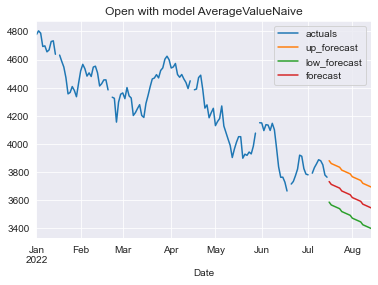

In [6]:
prediction = model.predict()
# plot a sample
prediction.plot(model.df_wide_numeric,
                series=model.df_wide_numeric.columns[0],
                start_date="2022-01-01")

In [7]:
print(model)

Initiated AutoTS object with best model: 
AverageValueNaive
{'fillna': 'rolling_mean_24', 'transformations': {'0': 'MinMaxScaler', '1': 'Detrend', '2': 'Detrend', '3': 'ClipOutliers', '4': 'bkfilter'}, 'transformation_params': {'0': {}, '1': {'model': 'Linear', 'phi': 1, 'window': 90}, '2': {'model': 'GLS', 'phi': 1, 'window': None}, '3': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '4': {}}}
{'method': 'Exp_Weighted_Mean', 'window': 60}
SMAPE: 6.393742127909657, 4.792447881882532, 5.366703058885406
MAE: 153427897.61439273, 77022180.8548323, 61220151.015666224
SPL: 0.9458256324446565, 1.3669569461022313, 1.9048895563314978


In [8]:
# point forecasts dataframe
forecasts_df = prediction.forecast
# upper and lower forecasts
forecasts_up, forecasts_low = prediction.upper_forecast, prediction.lower_forecast

In [9]:
# accuracy of all tried model results
model_results = model.results()
# and aggregated from cross validation
validation_results = model.results("validation")

In [10]:
prediction = model.predict()
forecast = prediction.forecast
print(symbol+"Price Prediction")
print(forecast)


^GSPCPrice Prediction
                   Open         High          Low        Close    Adj Close  \
2022-07-15  3733.156350  3769.343046  3695.193476  3734.792747  3734.792747   
2022-07-18  3713.058180  3749.251797  3675.012024  3714.658682  3714.658682   
2022-07-19  3706.358789  3742.554713  3668.284873  3707.947327  3707.947327   
2022-07-20  3699.659399  3735.857630  3661.557722  3701.235972  3701.235972   
2022-07-21  3692.960009  3729.160547  3654.830571  3694.524617  3694.524617   
2022-07-22  3686.260619  3722.463464  3648.103420  3687.813262  3687.813262   
2022-07-25  3666.162448  3702.372214  3627.921968  3667.679197  3667.679197   
2022-07-26  3659.463058  3695.675131  3621.194817  3660.967842  3660.967842   
2022-07-27  3652.763668  3688.978048  3614.467666  3654.256487  3654.256487   
2022-07-28  3646.064277  3682.280965  3607.740516  3647.545132  3647.545132   
2022-07-29  3639.364887  3675.583882  3601.013365  3640.833777  3640.833777   
2022-08-01  3619.266716  3655.

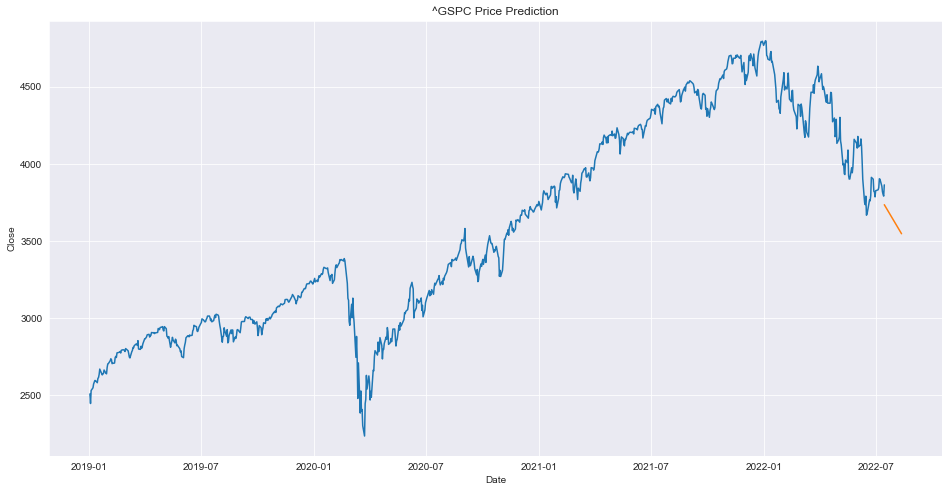

In [11]:
plt.figure(figsize=(16, 8))
plt.title(symbol + " Price Prediction")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(df['Adj Close'])
plt.plot(forecast["Adj Close"])
plt.show()